In [22]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#load the two datasets--titles  and credit
titles=pd.read_csv("/home/iradspm/Msc/Data Analytics/Datasets/Amazon Prime TV Shows and Movies/titles.csv")
credit=pd.read_csv("/home/iradspm/Msc/Data Analytics/Datasets/Amazon Prime TV Shows and Movies/credits.csv")

In [24]:
titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [25]:
credit.head(5)

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [26]:
titles.shape

(9871, 15)

In [27]:
credit.shape

(124235, 5)

**Titles Dataset Exploration**

In [28]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [29]:
#get the total null values for each column
titles.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [30]:
#get percentage of null values for each column
null_percentage=round(100*(titles.isnull().sum()/len(titles.index)),2)
null_percentage

id                       0.00
title                    0.00
type                     0.00
description              1.21
release_year             0.00
age_certification       65.72
runtime                  0.00
genres                   0.00
production_countries     0.00
seasons                 86.25
imdb_id                  6.76
imdb_score              10.34
imdb_votes              10.44
tmdb_popularity          5.54
tmdb_score              21.09
dtype: float64

In [31]:
#columns to drop
columns=['age_certification','seasons']
titles_1=titles.drop(columns=columns)

In [32]:
titles_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   runtime               9871 non-null   int64  
 6   genres                9871 non-null   object 
 7   production_countries  9871 non-null   object 
 8   imdb_id               9204 non-null   object 
 9   imdb_score            8850 non-null   float64
 10  imdb_votes            8840 non-null   float64
 11  tmdb_popularity       9324 non-null   float64
 12  tmdb_score            7789 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1002.6+ KB


In [33]:
'''
For description and imdb_id, replace with 'no data'-their are statements
For imdb_score,tmdb_score,imdb_votes and tmdb_popularity, replace with column mean
'''
titles_1['imdb_score']=titles_1['imdb_score'].fillna(titles_1['imdb_score'].mean())
titles_1['imdb_votes']=titles_1['imdb_votes'].fillna(titles_1['imdb_votes'].mean())
titles_1['tmdb_popularity']=titles_1['tmdb_popularity'].fillna(titles_1['tmdb_popularity'].mean())
titles_1['tmdb_score']=titles_1['tmdb_score'].fillna(titles_1['tmdb_score'].mean())

In [98]:
titles_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   runtime               9871 non-null   int64  
 6   genres                9871 non-null   object 
 7   production_countries  9871 non-null   object 
 8   imdb_id               9204 non-null   object 
 9   imdb_score            9871 non-null   float64
 10  imdb_votes            9871 non-null   float64
 11  tmdb_popularity       9871 non-null   float64
 12  tmdb_score            9871 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1002.6+ KB


In [99]:
titles_1.isnull().sum()

id                        0
title                     0
type                      0
description             119
release_year              0
runtime                   0
genres                    0
production_countries      0
imdb_id                 667
imdb_score                0
imdb_votes                0
tmdb_popularity           0
tmdb_score                0
dtype: int64

In [100]:
'''replace remaining null values with No data'''
titles_2=titles_1.fillna("No data")
titles_2.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [101]:
titles_2.head()

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,171,"['romance', 'war', 'drama']",['US'],tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,94,"['thriller', 'drama', 'romance']",['US'],tt0042593,7.9,30924.0,8.273,7.6


In [102]:
titles_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9871 non-null   object 
 4   release_year          9871 non-null   int64  
 5   runtime               9871 non-null   int64  
 6   genres                9871 non-null   object 
 7   production_countries  9871 non-null   object 
 8   imdb_id               9871 non-null   object 
 9   imdb_score            9871 non-null   float64
 10  imdb_votes            9871 non-null   float64
 11  tmdb_popularity       9871 non-null   float64
 12  tmdb_score            9871 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1002.6+ KB


***Analysis***

In [103]:
#type column analysis
type_col=titles_2['type'].value_counts()
type_col

MOVIE    8514
SHOW     1357
Name: type, dtype: int64

In [104]:
data = titles_2.groupby("type")["tmdb_popularity"].sum()#groupby the movie type by tmdb_popularity 
data

type
MOVIE    49518.746097
SHOW     18691.881717
Name: tmdb_popularity, dtype: float64

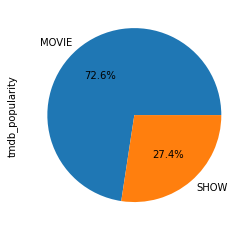

In [105]:
data.plot.pie(autopct="%.1f%%");

In [106]:
score=titles_2.groupby('type')['imdb_score'].sum()
score

type
MOVIE    49551.508249
SHOW      9441.491537
Name: imdb_score, dtype: float64

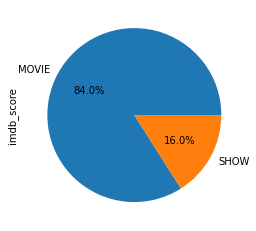

In [107]:
score.plot.pie(autopct="%.1f%%");

In [108]:
imdb_vot=titles_2.groupby('type')['imdb_votes'].sum()
imdb_vot

type
MOVIE    7.067440e+07
SHOW     1.356091e+07
Name: imdb_votes, dtype: float64

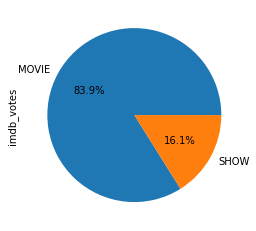

In [109]:
imdb_vot.plot.pie(autopct="%.1f%%");

In [110]:
tmdb_sco=titles_2.groupby('type')['tmdb_score'].sum()
tmdb_sco

type
MOVIE    49645.656914
SHOW      9424.845372
Name: tmdb_score, dtype: float64

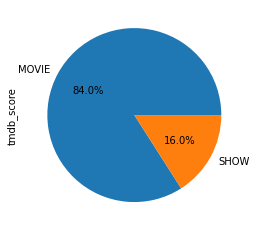

In [111]:
tmdb_sco.plot.pie(autopct="%.1f%%");

In [112]:
release_y=titles_2.groupby('release_year')['runtime'].sum()
release_y

release_year
1912       71
1914      144
1915      319
1916      335
1917       73
        ...  
2018    59560
2019    74510
2020    59200
2021    72967
2022     7091
Name: runtime, Length: 110, dtype: int64

In [113]:
import seaborn as sns

<AxesSubplot:title={'center':'Longest movie/show on annual basis'}, xlabel='release_year', ylabel='runtime'>

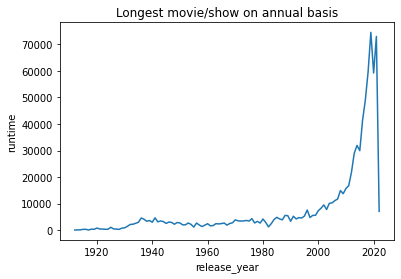

In [114]:
plt.title("Longest movie/show on annual basis")
sns.lineplot(data=release_y)

***Top countries having most content***

In [119]:
c=titles_2["production_countries"].value_counts()
c

['US']                4810
['IN']                1048
[]                     821
['GB']                 667
['CA']                 321
                      ... 
['TC']                   1
['FR', 'US', 'DE']       1
['PL', 'SK', 'CZ']       1
['PL', 'IL']             1
['US', 'PR']             1
Name: production_countries, Length: 497, dtype: int64

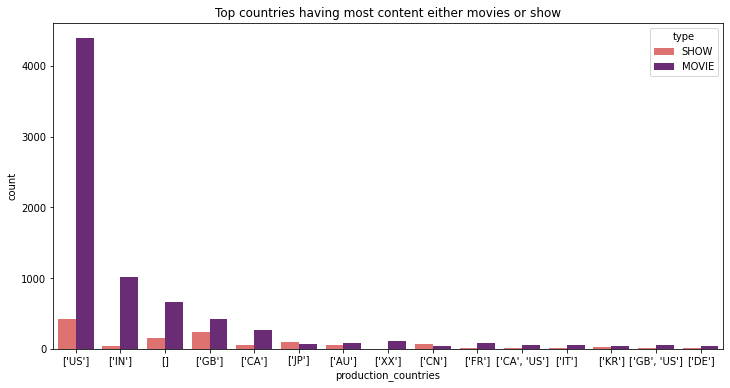

In [120]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = titles_2,x= 'production_countries',
              order = titles_2["production_countries"].value_counts().index[0:15],hue='type',
              palette = 'magma_r')
plt.title("Top countries having most content either movies or show")
plt.show()

**Check show or movie votes based on release year since 2000**

In [133]:
titles_3=titles_2[(titles_2['release_year']>2010)]
titles_3.head(2)

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4098,ts27630,Line of Duty,SHOW,"A drama about the investigations of AC-12, a c...",2012,60,"['crime', 'thriller', 'drama', 'european']",['GB'],tt2303687,8.7,55784.0,52.202,8.2
4099,ts22277,Suits,SHOW,"While running from a drug deal gone bad, Mike ...",2011,44,"['drama', 'comedy']",['US'],tt1632701,8.5,395600.0,356.533,8.1


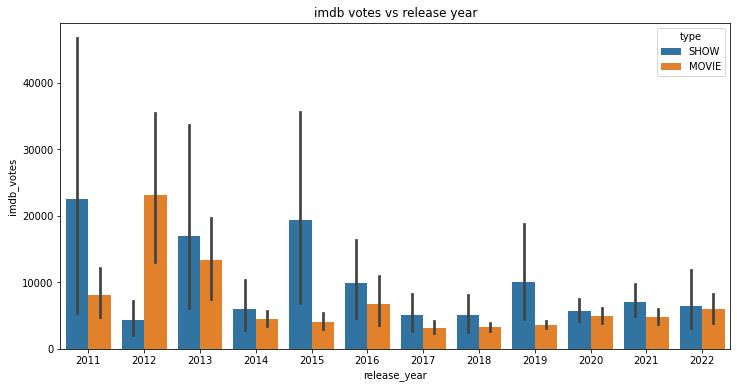

In [134]:
fig = plt.figure(figsize=(12,6))
sns.barplot(data = titles_3,y= 'imdb_votes', x= 'release_year',hue='type')
plt.title("imdb votes vs release year")
plt.show()    

In [135]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [136]:
credit.isnull().sum()

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64

In [137]:
#role column analysis
rol=credit['role'].value_counts()
rol

ACTOR       115846
DIRECTOR      8389
Name: role, dtype: int64

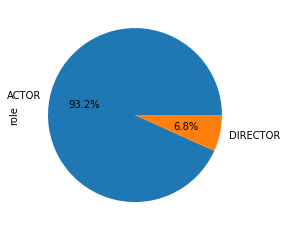

In [143]:
rol.plot.pie(autopct="%.1f%%");

In [144]:
#name column analysis
nam=credit['name'].value_counts()
nam

George 'Gabby' Hayes    49
Roy Rogers              45
Bess Flowers            44
Joseph Kane             41
Gene Autry              40
                        ..
Seigi Ozeki              1
Winai Kraibutr           1
Buakaw Banchamek         1
Thammaros Jaichuen       1
Ricky Lomax              1
Name: name, Length: 79758, dtype: int64

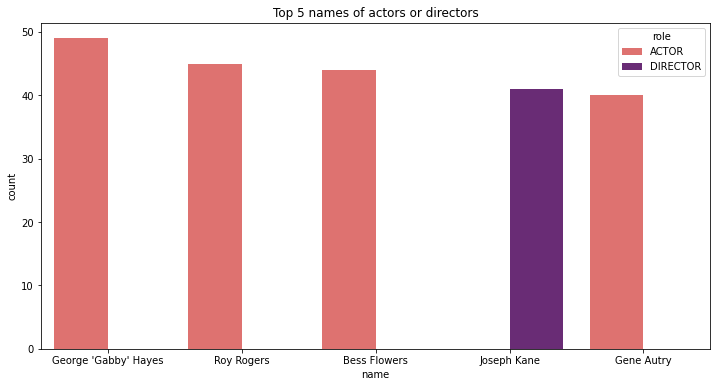

In [146]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = credit,x= 'name',
              order = credit["name"].value_counts().index[0:5],hue='role', palette = 'magma_r')
plt.title("Top 5 names of actors or directors")
plt.show()